In [8]:
import pandas as pd
import numpy as np
df=pd.DataFrame({"num":[8800, 9500, 9600, 10500, 10400, 9600, 10300, 9500, 9600, 7100, 10100, 7200]})
len(df)

12

In [9]:
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(df['num'])

ShapiroResult(statistic=0.8105747699737549, pvalue=0.012388509698212147)

귀무가설을 기각한다. 즉 정규성을 따르지 않는다.

In [10]:
mean0=10000
median=np.median(df.num)

In [12]:
df=df[df['num']!=median]
len(df)

9

In [13]:
stats.wilcoxon(df.num-mean0, alternative='two-sided')

WilcoxonResult(statistic=11.0, pvalue=0.203125)

귀무가설을 기각할 수 없다. 즉 진공관 수명은 1만시간이다.

# 문제2

In [14]:
mean0=60
n=10
df=pd.DataFrame({'num':[52,50,62,75,26,45,62,35,57,14]})
len(df)

10

In [15]:
median=np.median(df.num)
median

51.0

In [16]:
df=df[df['num']!=median]
len(df)

10

In [18]:
stats.wilcoxon(df.num-mean0, alternative='two-sided')

WilcoxonResult(statistic=9.5, pvalue=0.064453125)

귀무가설을 기각할 수 없다. 즉 모평균은 60이다.

# 문제3

In [19]:
from scipy.stats import chi2_contingency
df=pd.DataFrame({'index':["1.5-2.5", "2.5-3.5", "3.5-4.5"], "사회과학":[15,60,24], "자연과학":[25,69,6], "공학":[10, 77,14]})
df.set_index("index", inplace=True)
df

,사회과학,자연과학,공학
index,,,
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,6,14


In [20]:
chi, p, df, expect=chi2_contingency(df)

In [21]:
chi, p, expect

(20.213713780910304,
 0.0004531468852769105,
 array([[16.5       , 16.66666667, 16.83333333],
        [67.98      , 68.66666667, 69.35333333],
        [14.52      , 14.66666667, 14.81333333]]))

In [22]:
df=pd.DataFrame({'num':[3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]})
df

,num
0,3.1
1,3.3
2,3.5
3,3.7
4,3.9
5,4.1
6,4.3
7,4.4
8,4.7


In [28]:
n=9
alpha=0.05
s_mean=np.mean(df.num)
u_var=np.var(df.num,ddof=1)
rv=stats.t(df=n-1)
lcl=s_mean-rv.isf(alpha/2)*np.sqrt(u_var/n)
ucl=s_mean-rv.isf(1-alpha/2)*np.sqrt(u_var/n)
lcl, ucl

(3.477733308601972, 4.300044469175807)

In [31]:
alpha=0.05
n=9
s_mean=np.mean(df.num)
p_var=0.4**2
rv=stats.norm()
lcl=s_mean-1.96*np.sqrt(p_var/n)
ucl=s_mean+1.96*np.sqrt(p_var/n)

In [30]:
lcl, ucl

(3.6275603576168822, 4.150217420160897)

In [32]:
lcl,ucl

(3.6275555555555563, 4.150222222222223)

# 문제4

H0 : 두 모평균 사이의 차이는 없다.

H1 : 두 모평균 사이의 차이는 있다.

In [33]:
mean_A=5.7
mean_B=5.6
var_A=0.03**2
var_B=0.04**2
n_A=12
n_B=12
# 정규분포/등분산 가정

In [35]:
sp=np.sqrt(((n_A-1)*var_A+(n_B-1)*var_B)/(n_A+n_B-2))
sp

0.035355339059327376

In [37]:
t=(mean_A-mean_B)/(sp*np.sqrt(1/n_A+1/n_B))
t

6.928203230275546

In [38]:
rv=stats.t(df=n_A+n_B-2)
p=(1-rv.cdf(t))*2
p

5.892973662380285e-07

귀무가설을 기각한다. 즉 두 모평균 사이의 차이는 있다.

# 문제5

In [40]:
n=10
u_var=6.42
alpha=0.1
rv=stats.chi2(df=n-1)

lcl=(n-1)*u_var/rv.isf(alpha/2)
ucl=(n-1)*u_var/rv.isf(1-alpha/2)
lcl, ucl

(3.415099975321245, 17.37685387744868)

In [42]:
n=20
u_var=90**2
alpha=0.1
rv=stats.chi2(df=n-1)
lcl=(n-1)*u_var/rv.isf(alpha/2)
ucl=(n-1)*u_var/rv.isf(1-alpha/2)

In [44]:
lcl, ucl

(5105.573709077189, 15211.99973041214)

In [45]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df=pd.DataFrame({'price':[22.0, 23.4, 21.1, 25.7, 27.4, 30.6, 31.8, 30.2, 41.1]}, index=[1,2,3,4,5,6,7,8,9])
df

,price
1,22.0
2,23.4
3,21.1
4,25.7
5,27.4
6,30.6
7,31.8
8,30.2
9,41.1


In [46]:
moving_average=df['price'].rolling(window=3).mean()
moving_average

1          NaN
2          NaN
3    22.166667
4    23.400000
5    24.733333
6    27.900000
7    29.933333
8    30.866667
9    34.366667
Name: price, dtype: float64

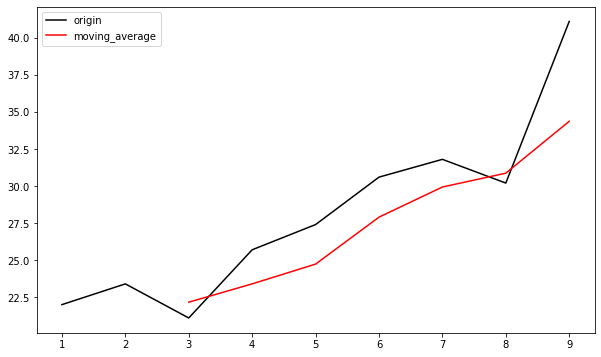

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df.index, df.price, color='k', label='origin')
plt.plot(moving_average.index, moving_average, color='red', label='moving_average')
plt.legend()
plt.show()